In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("../data/Housing.csv")

# Display first few rows
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [18]:
import pandas as pd

# Load dataset
df = pd.read_csv("../data/Housing.csv")

# Check for missing values
print(df.isnull().sum().sort_values(ascending=False).head(10))

# Select numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns  

# Fill missing values in numeric columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Convert categorical variables to numeric
df = pd.get_dummies(df, drop_first=True)

# Select features and target
features = ["area", "bedrooms", "bathrooms", "stories"]  # Example feature selection
target = "price"

X = df[features]
y = df[target]

print("✅ Data Preprocessing Complete")


price              0
area               0
bedrooms           0
bathrooms          0
stories            0
mainroad           0
guestroom          0
basement           0
hotwaterheating    0
airconditioning    0
dtype: int64
✅ Data Preprocessing Complete


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")


Mean Absolute Error: 1158970.4803166876


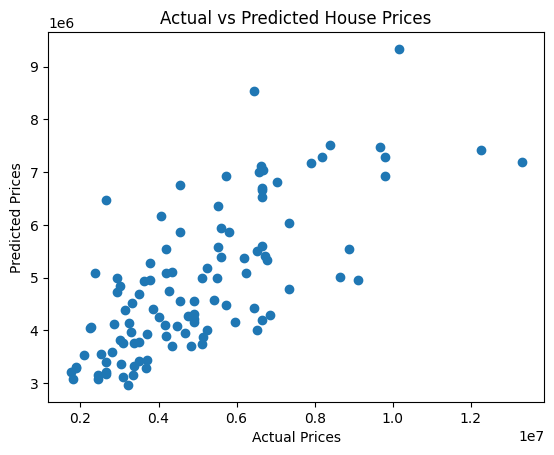

In [20]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()
